In [103]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y = [100,60,50,60,60,55,60,65,70,70,75,76,78,90,99,99,100]


In [104]:
len(x)

17

In [105]:
len(y)

17

In [106]:
import matplotlib.pyplot as plt

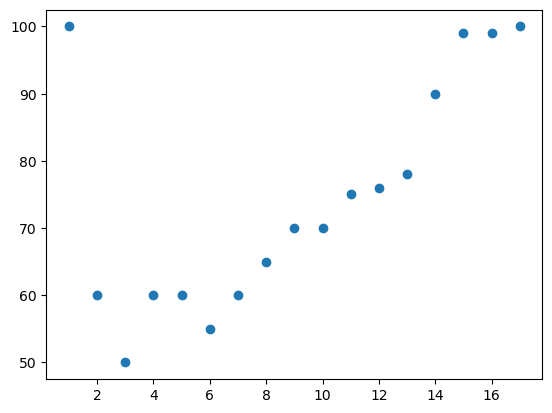

In [107]:
plt.scatter(x,y)
plt.show()

In [108]:
import numpy as np

In [109]:
y_predicted = np.poly1d(np.polyfit(x,y,3))
y_predicted

poly1d([-6.15325077e-02,  2.09468524e+00, -1.79320175e+01,  1.00705882e+02])

In [110]:
line = np.linspace(1, 17, 150)
line

array([ 1.        ,  1.10738255,  1.2147651 ,  1.32214765,  1.4295302 ,
        1.53691275,  1.6442953 ,  1.75167785,  1.8590604 ,  1.96644295,
        2.0738255 ,  2.18120805,  2.2885906 ,  2.39597315,  2.5033557 ,
        2.61073826,  2.71812081,  2.82550336,  2.93288591,  3.04026846,
        3.14765101,  3.25503356,  3.36241611,  3.46979866,  3.57718121,
        3.68456376,  3.79194631,  3.89932886,  4.00671141,  4.11409396,
        4.22147651,  4.32885906,  4.43624161,  4.54362416,  4.65100671,
        4.75838926,  4.86577181,  4.97315436,  5.08053691,  5.18791946,
        5.29530201,  5.40268456,  5.51006711,  5.61744966,  5.72483221,
        5.83221477,  5.93959732,  6.04697987,  6.15436242,  6.26174497,
        6.36912752,  6.47651007,  6.58389262,  6.69127517,  6.79865772,
        6.90604027,  7.01342282,  7.12080537,  7.22818792,  7.33557047,
        7.44295302,  7.55033557,  7.65771812,  7.76510067,  7.87248322,
        7.97986577,  8.08724832,  8.19463087,  8.30201342,  8.40

In [111]:
model = y_predicted(line)
model

array([84.80701754, 83.33342355, 81.90342291, 80.51655845, 79.17237304,
       77.87040953, 76.61021076, 75.3913196 , 74.21327888, 73.07563147,
       71.97792022, 70.91968797, 69.90047758, 68.91983191, 67.97729379,
       67.07240609, 66.20471166, 65.37375334, 64.579074  , 63.82021648,
       63.09672363, 62.4081383 , 61.75400335, 61.13386164, 60.547256  ,
       59.99372929, 59.47282437, 58.98408409, 58.52705129, 58.10126884,
       57.70627957, 57.34162635, 57.00685203, 56.70149945, 56.42511147,
       56.17723094, 55.95740071, 55.76516364, 55.60006257, 55.46164036,
       55.34943987, 55.26300393, 55.2018754 , 55.16559715, 55.153712  ,
       55.16576283, 55.20129248, 55.2598438 , 55.34095964, 55.44418286,
       55.56905631, 55.71512284, 55.8819253 , 56.06900654, 56.27590942,
       56.50217678, 56.74735148, 57.01097638, 57.29259431, 57.59174814,
       57.90798071, 58.24083489, 58.58985351, 58.95457943, 59.33455551,
       59.72932459, 60.13842953, 60.56141317, 60.99781838, 61.44

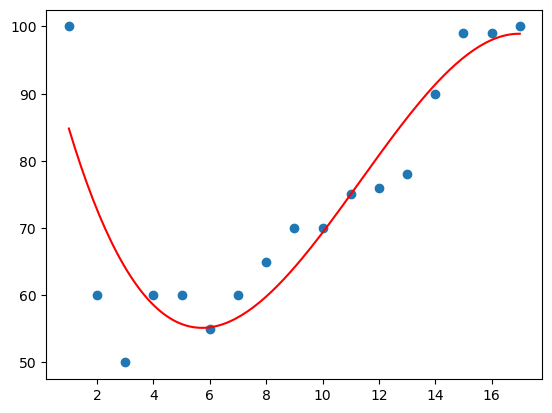

In [112]:
plt.scatter(x,y)
plt.plot(line,model,color='r')
plt.show()

In [113]:
import pandas as pd

In [114]:
s1 = pd.Series(x, name = "Time")

In [115]:
s2 = pd.Series(y, name = "speed")


In [116]:
s1

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
Name: Time, dtype: int64

In [117]:
s2

0     100
1      60
2      50
3      60
4      60
5      55
6      60
7      65
8      70
9      70
10     75
11     76
12     78
13     90
14     99
15     99
16    100
Name: speed, dtype: int64

In [118]:
df = pd.concat([s1,s2],axis=1)

In [119]:
df.head()

,Time,speed
0,1,100
1,2,60
2,3,50
3,4,60
4,5,60


In [120]:
from sklearn.preprocessing import PolynomialFeatures

In [121]:
pf = PolynomialFeatures()

In [122]:
x1 = pf.fit_transform(df[['Time']])

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
model = LinearRegression()

In [125]:
model.fit(x1,df.speed)

LinearRegression()

In [128]:
coef = model.coef_
coef

array([ 0.        , -5.625516  ,  0.43330753])

In [129]:
intercept = model.intercept_
intercept

79.66176470588225

In [130]:
y_predicted = intercept + line*coef[1] + coef[2]*line**2
y_predicted 

array([ 74.46955624,  73.9635298 ,  73.4674963 ,  72.98145576,
        72.50540816,  72.03935351,  71.58329181,  71.13722306,
        70.70114726,  70.2750644 ,  69.8589745 ,  69.45287754,
        69.05677354,  68.67066248,  68.29454437,  67.92841921,
        67.572287  ,  67.22614774,  66.89000142,  66.56384806,
        66.24768764,  65.94152017,  65.64534565,  65.35916409,
        65.08297546,  64.81677979,  64.56057707,  64.3143673 ,
        64.07815047,  63.85192659,  63.63569567,  63.42945769,
        63.23321266,  63.04696057,  62.87070144,  62.70443526,
        62.54816202,  62.40188174,  62.2655944 ,  62.13930001,
        62.02299857,  61.91669008,  61.82037454,  61.73405195,
        61.6577223 ,  61.59138561,  61.53504186,  61.48869107,
        61.45233322,  61.42596832,  61.40959637,  61.40321736,
        61.40683131,  61.42043821,  61.44403805,  61.47763084,
        61.52121659,  61.57479528,  61.63836692,  61.7119315 ,
        61.79548904,  61.88903953,  61.99258296,  62.10

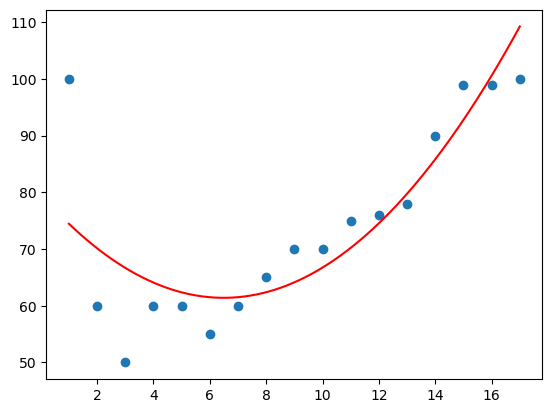

In [131]:
plt.scatter(x,y)
plt.plot(line,y_predicted , color='r')
plt.show()

In [132]:
model.predict(x1)

array([ 74.46955624,  70.14396285,  66.68498452,  64.09262126,
        62.36687307,  61.50773994,  61.51522188,  62.38931889,
        64.13003096,  66.7373581 ,  70.21130031,  74.55185759,
        79.75902993,  85.83281734,  92.77321981, 100.58023736,
       109.25386997])

In [133]:
model.score(x1,df['speed'])

0.7187056690952769